# Fine-tuning keras models
> Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks. This is the Summary of lecture "Introduction to Deep Learning in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: images/of.png

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Understanding model optimization
 - Why optimization is hard
     - Simultaneously optimizing 1000s of parameters with complex relationships
     - Updates may not improve model meaningfully
     - Updates too small (if learning rate is low) or too large (if learning rate is high)
 - Vanishing gradients
     - Occurs when many layers have very small slopes (e.g. due to being on flat part of tanh curve)
     - In deep networks, updates to backprop were close to 0

### Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results.

In [4]:
df = pd.read_csv('./dataset/titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [5]:
from tensorflow.keras.utils import to_categorical

predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = to_categorical(df.iloc[:, 0].astype(np.float32).to_numpy())

In [7]:
input_shape = (10, )

def get_new_model(input_shape = input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, activation='relu', input_shape = input_shape))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return model

In [10]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n' % lr)
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = tf.keras.optimizers.SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 2.1949
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 2.1499
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 2.1049
Epoch 4/10
28/28 [==============================] - 0s 997us/step - loss: 2.0602
Epoch 5/10
28/28 [==============================] - 0s 954us/step - loss: 2.0157
Epoch 6/10
28/28 [==============================] - 0s 1ms/step - loss: 1.9715
Epoch 7/10
28/28 [==============================] - 0s 1ms/step - loss: 1.9275
Epoch 8/10
28/28 [==============================] - 0s 988us/step - loss: 1.8839
Epoch 9/10
28/28 [==============================] - 0s 1ms/step - loss: 1.8403
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 1.7973


Testing model with learning rate: 0.010000

Epoch 1/10
28/28 [==============================] - 0s 1ms/step - loss: 1.8178
Epoch 2/10
28/28 [==============

## Model validation
- Validation in deep learning
    - Commonly use validation split rather than cross-validation
    - Deep learning widely used on large datasets
    - Single validation score is based on large amount of data, and is reliable
- Experimentation
    - Experiment with different architectures
        - More layers
        - Fewer layers
        - Layers with more nodes
        - Layers with fewer nodes
        - Creating a great model requires experimentation

### Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as `model`. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [14]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, epochs=10, validation_split=0.3)

Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 0.8035 - accuracy: 0.6308 - val_loss: 0.5820 - val_accuracy: 0.7090
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.6934 - val_loss: 0.5344 - val_accuracy: 0.7239
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7710 - accuracy: 0.6372 - val_loss: 0.7069 - val_accuracy: 0.7239
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.6533 - val_loss: 0.6188 - val_accuracy: 0.6754
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.6822 - val_loss: 0.5743 - val_accuracy: 0.7239
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6758 - val_loss: 0.5045 - val_accuracy: 0.7463
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.6870 - val_loss: 0.6298 - val_accuracy: 0.6530
Epoch 8/10
20/20 [==

### Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to `.fit()`.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3,
          callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.6469 - val_loss: 0.5595 - val_accuracy: 0.7201
Epoch 2/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6549 - val_loss: 0.5452 - val_accuracy: 0.7276
Epoch 3/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6613 - val_loss: 0.5755 - val_accuracy: 0.7351
Epoch 4/30
20/20 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6629 - val_loss: 0.5584 - val_accuracy: 0.7500


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 4 epochs.

### Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called `model_1` has been pre-loaded. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called `model_2` which is similar to `model_1`, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.

In [27]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(10, activation='relu', input_shape=input_shape))
model_1.add(tf.keras.layers.Dense(10, activation='relu'))
model_1.add(tf.keras.layers.Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_75 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


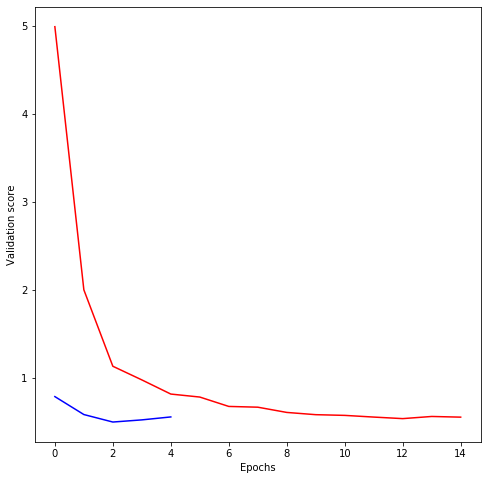

In [28]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = tf.keras.Sequential()

# Add the first and second layers
model_2.add(tf.keras.layers.Dense(100, activation='relu', input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(100, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)

# Create th eplot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b');
plt.xlabel('Epochs')
plt.ylabel('Validation score');

### Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called `model_1` as a starting point. It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.

In [36]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(50, activation='relu', input_shape=input_shape))
model_1.add(tf.keras.layers.Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model_1.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


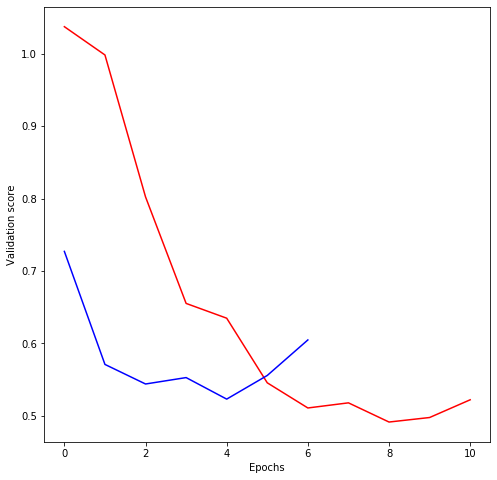

In [38]:
# Create the new model: model_2
model_2 = tf.keras.Sequential()

# Add the first, second, and third hidden layers
model_2.add(tf.keras.layers.Dense(50, activation='relu', input_shape=input_shape))
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(50, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b');
plt.xlabel('Epochs');
plt.ylabel('Validation score');

## Thinking about model capacity
- Overfitting
![of](image/of.png)
- Workflow for optimizing model capacity
    - Start with a small network
    - Gradually increase capacity
    - Keep increasing capacity until validation score is no longer improving

## Stepping up to images

### Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

In [40]:
mnist = pd.read_csv('./dataset/mnist.csv', header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
X = mnist.iloc[:, 1:].astype(np.float32).to_numpy()
y = to_categorical(mnist.iloc[:, 0])

In [46]:
# Create the model: model
model = tf.keras.Sequential()

# Add the first hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(X.shape[1], )))

# Add the second hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=50);

Epoch 1/50
44/44 [==============================] - 0s 3ms/step - loss: 18.8407 - accuracy: 0.4229 - val_loss: 7.5732 - val_accuracy: 0.5391
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 4.0665 - accuracy: 0.6879 - val_loss: 4.7740 - val_accuracy: 0.6456
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 2.1160 - accuracy: 0.7729 - val_loss: 4.4106 - val_accuracy: 0.6689
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 1.2134 - accuracy: 0.8307 - val_loss: 3.7577 - val_accuracy: 0.6839
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.9683 - accuracy: 0.8614 - val_loss: 3.5194 - val_accuracy: 0.7238
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.9114 - val_loss: 3.1736 - val_accuracy: 0.7288
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.9221 - val_loss: 3.3420 - val_accuracy: 0.7255
Epoch 8/50
44/44 [=